## Best result: 88.67%

### Things to do

- reduced the train size, i.e., adjusted train test split. - DONE
- Increase the number of training samples set to 10,000 - DONE
- reduce learning rate (from 0.001 to 0.0001) the increased back to 0.0005 - DONE
- add extra layers to the network - NOW
- increase the feature vector size

### A Note on Tuning Hyperparameters

The following are the hypterparameters I can tune with.
- Number of samples per class.
- Learning rate
- FFT size (this may force us to change the network architecture, i.e., number of layers and number of nodes per layer.)
- FFT overlap
- Epoch size

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Functions

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Loading an EM Trace and Plotting

#### Settings:

In [3]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [4]:
labels = ["calender-app", "camera-photo", "camera-video", "email-app", "gallary-app"
          , "home-screen", "idle-device", "phone-app", "sms-app", "web-browser"]

#### Preparing the Data of Class 0

In [5]:
class_label = 0

In [6]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/calandar-app.cfile")

In [7]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

/home/asanka/miniconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


2048
40959
(2048, 40959)


In [8]:
del data

In [9]:
Zxx = Zxx.transpose()

In [10]:
X = Zxx[:num_samp_per_class]
y = np.full(num_samp_per_class, class_label)
del Zxx

In [11]:
print(X.shape)
print(y.shape)

(10000, 2048)
(10000,)


#### Preparing the Data of Class 1

In [12]:
class_label = 1

In [13]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/camera-photo.cfile")

In [14]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
31453
(2048, 31453)


In [15]:
del data

In [16]:
Zxx = Zxx.transpose()

In [17]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [18]:
print(X.shape)
print(y.shape)

(20000, 2048)
(20000,)


#### Preparing the Data of Class 2

In [19]:
class_label = 2

In [20]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/camera-video.cfile")

In [21]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
34452
(2048, 34452)


In [22]:
del data

In [23]:
Zxx = Zxx.transpose()

In [24]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [25]:
print(X.shape)
print(y.shape)

(30000, 2048)
(30000,)


#### Preparing the Data of Class 3

In [26]:
class_label = 3

In [27]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/email-app.cfile")

In [28]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
42785
(2048, 42785)


In [29]:
del data

In [30]:
Zxx = Zxx.transpose()

In [31]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [32]:
print(X.shape)
print(y.shape)

(40000, 2048)
(40000,)


#### Preparing the Data of Class 4

In [33]:
class_label = 4

In [34]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/gallary-app.cfile")

In [35]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
43708
(2048, 43708)


In [36]:
del data

In [37]:
Zxx = Zxx.transpose()

In [38]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [39]:
print(X.shape)
print(y.shape)

(50000, 2048)
(50000,)


#### Preparing the Data of Class 5

In [40]:
class_label = 5

In [41]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/home-screen.cfile")

In [42]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
42136
(2048, 42136)


In [43]:
del data

In [44]:
Zxx = Zxx.transpose()

In [45]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [46]:
print(X.shape)
print(y.shape)

(60000, 2048)
(60000,)


#### Preparing the Data of Class 6

In [47]:
class_label = 6

In [48]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/idle.cfile")

In [49]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
35604
(2048, 35604)


In [50]:
del data

In [51]:
Zxx = Zxx.transpose()

In [52]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [53]:
print(X.shape)
print(y.shape)

(70000, 2048)
(70000,)


#### Preparing the Data of Class 7

In [54]:
class_label = 7

In [55]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/phone-app.cfile")

In [56]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
50251
(2048, 50251)


In [57]:
del data

In [58]:
Zxx = Zxx.transpose()

In [59]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [60]:
print(X.shape)
print(y.shape)

(80000, 2048)
(80000,)


#### Preparing the Data of Class 8

In [61]:
class_label = 8

In [62]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/sms-app.cfile")

In [63]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
40086
(2048, 40086)


In [64]:
del data

In [65]:
Zxx = Zxx.transpose()

In [66]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [67]:
print(X.shape)
print(y.shape)

(90000, 2048)
(90000,)


#### Preparing the Data of Class 9

In [68]:
class_label = 9

In [69]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/web-browser-app.cfile")

In [70]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
print(len(f))
print(len(t))
print(Zxx.shape)

2048
34379
(2048, 34379)


In [71]:
del data

In [72]:
Zxx = Zxx.transpose()

In [73]:
X = np.concatenate((X, Zxx[:num_samp_per_class]), axis=0) 
y = np.concatenate((y, np.full(num_samp_per_class, class_label)), axis=0)
del Zxx

In [74]:
print(X.shape)
print(y.shape)

(100000, 2048)
(100000,)


### Building the Model

In [75]:
X = abs(X)

# scaling the features (only real part of the data can be used)
scaler = MinMaxScaler()
scaler.fit(X)
print(scaler.data_max_)
X = scaler.transform(X)

[0.03161978 0.01834747 0.01330199 ... 0.01502602 0.01557955 0.02436738]


In [76]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [77]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))

model.add(keras.layers.Dense(1400, activation="relu"))

model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1400)              2868600   
_________________________________________________________________
dense_1 (Dense)              (None, 800)               1120800   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 4,511,210
Trainable params: 4,511,210
Non-trainable params: 0
______________________________________________

In [78]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [79]:
#history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
#history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

checkpoint_cb = keras.callbacks.ModelCheckpoint("./2.Sony-Xperia-Analysis.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/50
2532/2532 [==============================] - 50s 20ms/step - loss: 2.2974 - accuracy: 0.1509 - val_loss: 2.2905 - val_accuracy: 0.2111
Epoch 2/50
2532/2532 [==============================] - 51s 20ms/step - loss: 2.2795 - accuracy: 0.2403 - val_loss: 2.2643 - val_accuracy: 0.2817
Epoch 3/50
2532/2532 [==============================] - 51s 20ms/step - loss: 2.2293 - accuracy: 0.3316 - val_loss: 2.1754 - val_accuracy: 0.3324
Epoch 4/50
2532/2532 [==============================] - 51s 20ms/step - loss: 2.0303 - accuracy: 0.3228 - val_loss: 1.8247 - val_accuracy: 0.3272
Epoch 5/50
2532/2532 [==============================] - 51s 20ms/step - loss: 1.6282 - accuracy: 0.4038 - val_loss: 1.4630 - val_accuracy: 0.5503
Epoch 6/50
2532/2532 [==============================] - 54s 21ms/step - loss: 1.3298 - accuracy: 0.6047 - val_loss: 1.2075 - val_accuracy: 0.6318
Epoch 7/50
2532/2532 [==============================] - 55s 22ms/step - loss: 1.1321 - accuracy: 0.6348 - val_loss: 1.0648 -

### Plotting

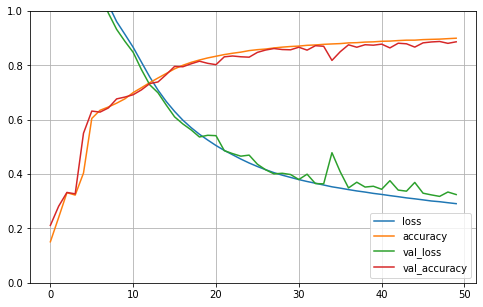

In [80]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Testing the Model

In [81]:
model = keras.models.load_model("./2.Sony-Xperia-Analysis.h5")

In [82]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 7ms/step - loss: 0.3354 - accuracy: 0.0996
test loss, test acc: [0.3354182243347168, 0.09960000216960907]


In [83]:
#y_pred = model.predict(X_test)
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [84]:
print(y_pred)

[0 6 5 ... 6 5 6]


In [85]:
print(y_pred[0])

0


In [86]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[968   3  32   0   0   3   4   0   1   0]
 [  0 978   0   0   0   3  22   3   0   4]
 [ 17   1 875  23  69   1   4   0   3   0]
 [  3   0  23 846  62   2   2   0   1   0]
 [  8   0 114 197 719   1   3   0   1   0]
 [  0   8   0   1   0 746   9  48 204  11]
 [  0  28   0   0   2   1 968   0   0   0]
 [  0   7   0   0   0  24   7 930   6   0]
 [  0   5   0   0   0 172   4  11 811   0]
 [  0  11   0   0   0  14   3   0   1 972]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1011
           1       0.94      0.97      0.95      1010
           2       0.84      0.88      0.86       993
           3       0.79      0.90      0.84       939
           4       0.84      0.69      0.76      1043
           5       0.77      0.73      0.75      1027
           6       0.94      0.97      0.96       999
           7       0.94      0.95      0.95       974
           8       0.79      0.81      0.80      1003
           9       0.98     

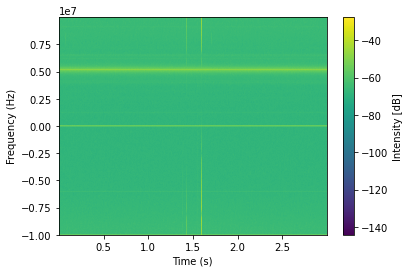

In [81]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/sony-xperia/calandar-app.cfile")

fig = plt.figure()
pxx, freq, t, cax = plt.specgram(data, NFFT=1024, Fs=20e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

### Saving the Model

In [90]:
model.save("./2.Sony-Xperia-Analysis.h5")